# 파이썬 머신러닝 스터디
## [파이썬 완벽가이드 2단원_사이킷런으로 시작하는 머신러닝]

**01. 사이킷런 소개와 특징**
> 사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
 * 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공.
 * 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공.
 * 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 혼겨에서 사용되는 성숙한 라이브러리


**02.첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**

*붓꽃 데이터 세트로 붓꽃의 품종을 분류(Classification)하기*
> 분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나

> +)지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데
이터 세트에서 미지의 레이블을 예측. 즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 이 때 학습을 위해 주어진 데이터 세트를 학습 데이터 세트,머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭.

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split#데이터셋 나누는 함수

In [7]:
import pandas as pd

# 붓꽃 데이터 셋 로딩
iris = load_iris()
##피처들과 데이터값이 어떻게 구성돼있는지 확인
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(6)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [8]:
#학습용데이터& 테스트용 데이터 분리
# 학습데이터로 학습된 모델의 성능 평가하기 위한 테스트데이터
#train_test_split() 함수 사용
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)
#test_size: 테스트데이터 비율
#random_state: 호출할때마다 같은 데이터셋 생성하기위한 난수발생값
#->random_state 지정하지 않으면 수행할때마다 데이터셋 달라질 수 있다(R의 seed와 같은 의미)

In [9]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
#생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력해 호출하면 학습을 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [10]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
#'정확도'는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표

예측 정확도: 0.9333


**=>분류 예측 프로세스**
1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가
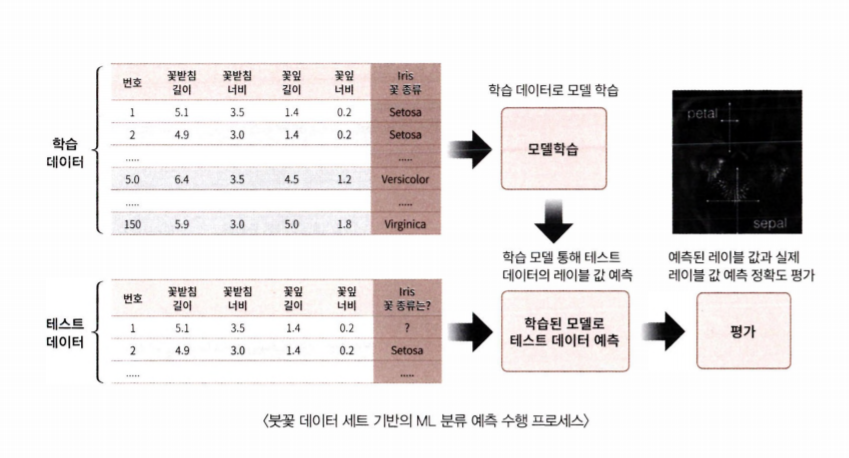

**03. 사이킷런의 기반 프레임워크 익히기**
* Estimator 이해 및 fit(), predict() 메서드
> 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression) 의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환. 
사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다. 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공하는데, 이들 Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부름. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름. 당연히 Estimator 클래스는 fit()과 predict()를 내부에서 구현하고 있다.
> cross_val_score( )와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원
하는 클래스의 경우 이 Estimator를 인자로 받는다. 인자로 받은 Estimator에 대해서 cross_val_
score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.
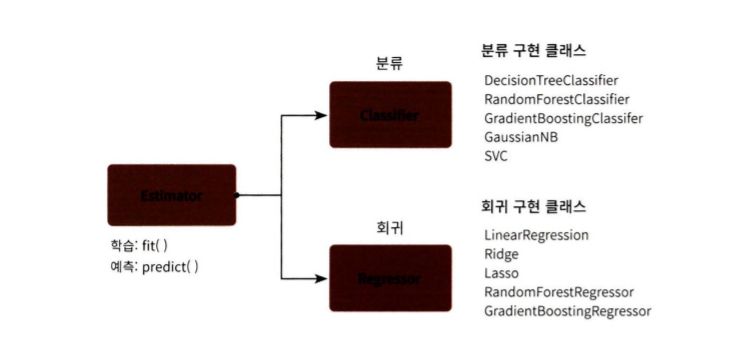
> 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit( )과 transform()을 적용하는데, 비지도학습과 피처 추출에서 fit( )은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다. fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클
러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행. 사이킷런은 fit()과 transform(
)을 하나로 결합한 fit_transform()도 함께 제공하는데 fit_transform()은 fit()과 transform()을 별
도로 호출할 필요를 줄여주지만, 사용에 약간의 주의가 필요하다.

* 사이킷런의 주요 모듈
> 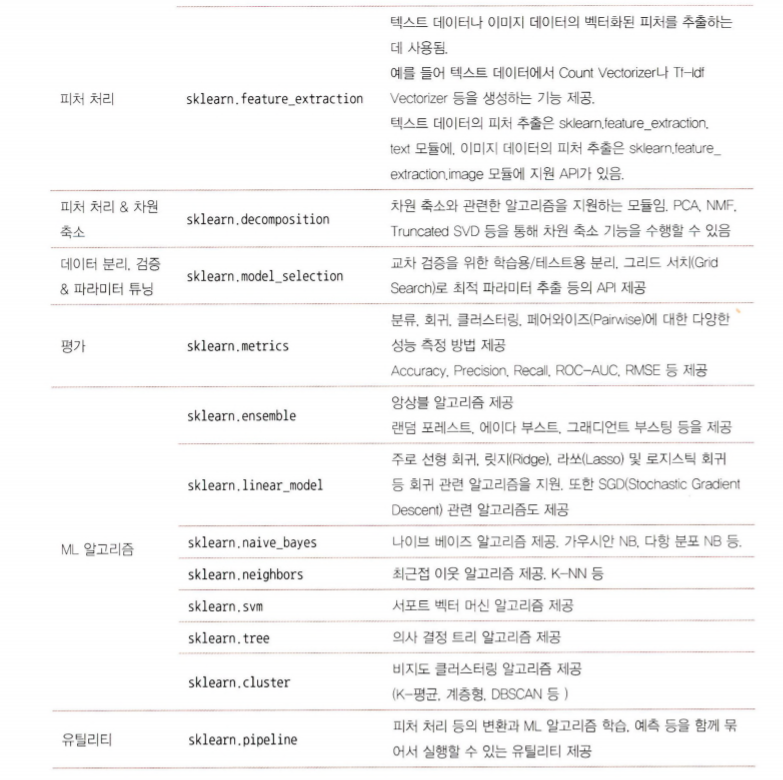
> 일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것.
사이킷런 패키지는 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위해 매우 편리하고 다양하며 유연한 모듈을 지원

* 내장된 예제 데이터셋
> * 회귀용
>>datasets.load_boston() : 보스턴 집 <br>
>> datasets.load_diabetes() : 당뇨
> * 분류용
>> datasets.load_breast_cancer() : 위스콘신 유방암<br>
>> datasets.load_digits()  : 0~9까지 숫자의 이미지 픽셀 <br>
>> datasets.load_iris() : 붓꽃
> * fetch 계열: 데이터의 크기가 커서 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터
>>fetch_covtype(): 회귀 분석용 토지 조사 자료<br>
>> fetch_20newsgroups( )： 뉴스 그룹 텍스트 자료<br>
>> fetch_olivetti_faces( )： 얼굴 이미지 자료<br>
>> fetch_lfw_people( )： 얼굴 이미지 자료<br>
>> fetch_lfw_pairs( )： 얼굴 이미지 자료<br>
>> fetch_rcv1(): 로이터 뉴스 말뭉치<br>
>> fetch_mldata( )： ML 웹사이트에서 다운로드
> * _분류와 클러스터링을 위한 표본 데이터 생성기_
>>datasets.make classification() : 분류를 위한 데이터 세트를 만듦. 특히 높은 상관도, 불필요한 속성 등 노이즈 효과를 위한 데이터를 무작위로 생성<br>
>>datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성. 군집 지정 개수에
따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 줌.


사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태<br>
: 키는 보통 data, target(분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트), target_name(개별 레이블의 이름), featurejnames, DESCR(데이터 세트에 대한 설명과 각 피처의 설명)로 구성


+)data, target은 넘파이 배열(ndarray) 타입이며. target names, feature_names는 넘파이 배열 또는
파이썬 리스트(list) 타입니다. DESCR은 스트링 타입


In [13]:
#붓꽃 데이터 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [14]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

**04. Model Selection 모듈 소개**<br>
사이킷런의 model_s이ection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분
할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

* 학습/테스트 데이터 세트 분리 - train_test_splitO

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))
#예측 결과가 100% 정확한 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문

예측 정확도: 1.0


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)
#train_test_split()의 반환값은 튜플 형태.
#순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 
 #학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환

In [18]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


--------


* 교차검증
> 학습/테스트 데이터 나누는건 과적합(Overfitting)에 취약한 약점 가질 수 있음 -> **교차검증 이용**<br>
>데이터는 이상
치, 분포도. 다양한 속성값, 피처 중요도 등 여러 가지 ML에 영향을 미치는 요소를 가지고 있는데 
특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는
많은 차이가 있을 것이고 결국 성능 저하로 이어질 것이다.<br>
교차 검증은 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증
데이터 세트에서 학습과 평가를 수행하는 것. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.<br><br>
> * K 폴드 교차 검증
>>K 폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법으로 먼저 K개의 데이터 폴드 세트를
만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법.
>>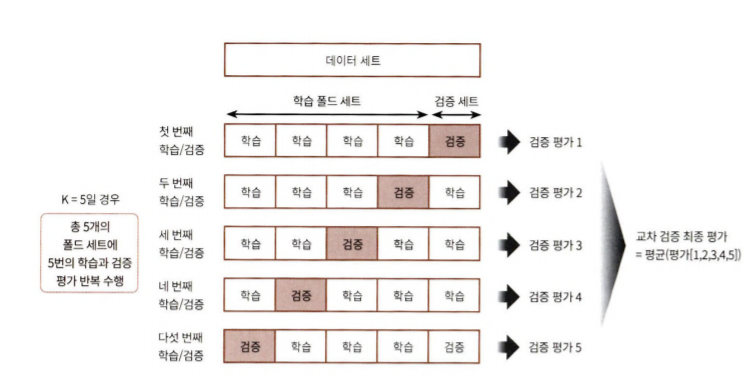
>>이렇게 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 5번째（K번째）까지 학
습과 검증을 수행하는 것이 바로 K 폴드 교차 검증! 5개（K개）의 예측 평가를 구했으면 이를 평
균해서 K 폴드 평가 결과로 반영하면 됨.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [20]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


> * Stratified K 폴드<br>
> 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식 ; 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것 <br>
->대출 사기 레이블이 1 인 레코드는 비록 건수는 작지만 알고리즘이 대출 사기를 예측하기 위한
중요한 피처 값을 가지고 있기 때문에 매우 중요한 데이터 세트. 따라서 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요<br><br>
Stratified K 폴드는 이처럼 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습
및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다. 이를 위해 Stratified K 폴드
는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
한다

In [21]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [23]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    16
1    16
0    16
Name: label, dtype: int64


In [22]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    
    #교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [24]:
dt_clf = DecisionTreeClassifier(random_state=156)
#StratifiedKFokl는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 줌
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.9804, 학습 데이터 크기: 99, 검증 데이터 크기: 51
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

#2 교차 검증 정확도 :0.9216, 학습 데이터 크기: 99, 검증 데이터 크기: 51
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

#3 교차 검증 정확도 :0.9792, 학습 데이터 크기: 102, 검증 데이터 크기: 48
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.9804 0.9216 0.9792]
## 평균 검증 정확도: 0.9604


=> StratifiedKFold를 사용하는 방법은 KFold를 사
용하는 방법과 거의 비슷하다. 단 하나 큰 차이는 StratifiedKFolc는 레이블 데이터 분포도에 따라
학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이
터 세트도 반드시 필요하다는 사실이다(K 폴드의 경우 레이블 데이터 세트는 split() 메서드의 인자
로 입력하지 않아도 무방)

> * 교차 검증을 보다 간편하게 一cross_val_score()
>> 교차검증을 좀 더 편리하게 수행할 수 있게 해주는 사이킷런의 API.<br>
>> * KFold: 
>>>1. 폴드 세트를 설정하고
>>>2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 
>>>3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환<br> => cross_val_score( )는 이런 일련의 과정을 한꺼번에 수행<br>

```cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,
pre_dispatch='2*n_jobs,)```
이 중 estimator, X, y, scoring, cv가 주요 파라미터<br>estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor
를 의미하고, X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표를 기술
하며, cv는 교차 검증 폴드 수를 의미 & cross_val_score( ) 수행 후 반환 값은 scoring 파라미
터로 지정된 성능 지표 측정값을 배열 형태로 반환
cross_val_score( )는 classifier가 입력되
면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다(회귀인 경우는
Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할).

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

#cross_val_score( )는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환
#일반적으로 이를 평균해 평가 수치로 사용

교차 검증별 정확도: [0.9804 0.9216 0.9792]
평균 검증 정확도: 0.9604


=> cross_val_score( )
API는 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차
검증을 수행할 수 있다.<br>붓꽃 데이터의 cross„val_score( ) 수행 결과와 앞 예제의 붓꽃 데이터
StratifiedKFold의 수행 결과를 비교해 보면 각 교차 검증별 정확도와 평균 검증 정확도가 모두 동일함
을 알 수 있는데 이는 cross_val_score() 가 내부적으로 StratifiedKFold를 이용하기 때문.

+)비슷한 API로 cross_valiciate()

> * GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
>>  하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며. 이 값을 조정해 알고리즘의 예측
성능을 개선할 수 있다.<br>
사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이
퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공
(Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식). 예를 들어 결
정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조
합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수
행할 수 있다.<br>
>>하이퍼 파라미터는 다음과 같이 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실
행하면서 최적의 파라미터와 수행 결과를 도출할 수 있다. for 루프로 모든 파라미터를 번갈아 입
력하면서 학습시키는 방법을 좀 더 유연하게 API 레벨에서 제공한 것
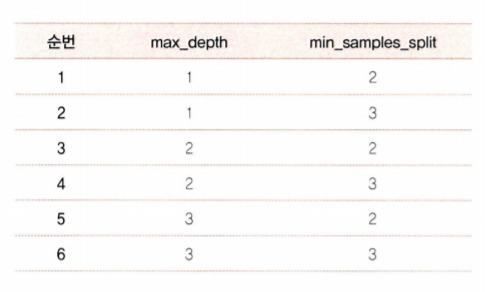
>>GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데
이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미
터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.
GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서
최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이
상대적으로 오래 걸리는 것에 유념.
위의 경우 순차적으로 6회에 걸쳐 하이퍼 파라미터를 변경하면서 교차 검증 데이터 세트에 수행 성능
을 측정. CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평
균값으로 성능을 측정. 6개의 파라미터 조합이라면 총 CV 3회 X 6개 파라미터 조합 = 18회의
학습/평가가 이뤄진다<br><br>
>> * GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터<br>
>>> * estimator： classifier, regressor, pipeline이 사용될 수 있습니다.<br>
>>> * param_grid： key + 리스트 값을 가지는 딕셔너리가 주어집니다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.<br>
>>> * scoring： 예측 성능을 측정할 평가 방법을 지정합니다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열（예: 정확도의 경우 ‘accuracy’）로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있습니다.<br>
>>> * cv： 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.<br>
>>> * refit： 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다<br>

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [28]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
#params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값
#rank_test_socre는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냅니다. 10| 가장 뛰어난 순위이며 
 #이때의 파라미터가 최적의 하이퍼 파라미터
#mean_test_score는 개별 하이퍼 파라미터별로 CV°| 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [29]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [30]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


=> 일반적으로
학습 데이터를 GridSearchCV# 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세
트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법

- - -

**05.데이터 전처리**
> 데이터 전처리(Data Preprocessing)는 ML 알고리즘만큼 중요하다. ML 알고리즘은 데이터에 기반
하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다(Garbage
In. Garbage Out). 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본
사항이 있음.<br>
결손값. 즉 NaN, Null 값은 허용되지 않음. 따라서 이러한 Null 값은 고정된 다른 값으로 변환. Null 값을 어떻게 처리해야 할지는 경우에 따라 다른데 피처 값 중 Null 값이 얼마 되지
않는다면 피처의 평균값 등으로 간단히 대체할 수 있다. 하지만 Null 값이 대부분이라면 오히려 해
당 피처는 드롭하는 것이 더 좋다. 가장 결정이 힘든 부분이 Null 값이 일정 수준 이상 되는 경우인데 정확히 몇 퍼센트까지를 일정 수준 이상이라고 한다는 기준은 없음. 하지만 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무 로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야함.<br>
사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않아서 모든 문자열 값
은 인코딩돼서 숫자 형으로 변환해야 함. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형
피처를 의미. 카테고리형 피처는 코드 값으로 표현하는 게 더 이해하기 쉬울 것이다. 텍스
트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나(‘텍스트 분석’ 장에서 피
처 벡터화에 대해 별도로 설명) 불필요한 피처라고 판단되면 삭제하는 게 좋다.<br><br>
> * 데이터 인코딩
>>머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원一핫 인코딩(One Hot
encoding)<br><br>
>> * 레이블 인코딩<br>카테고리 피처를
코드형 숫자 값으로 변환하는 것. 사이킷런의 레이블 인코딩 (Label encoding)은 LabelEncoder 클래스로 구현한다. LabelEncoder
를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행



In [31]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

#TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [33]:
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


=> 냉장고와 믹서의 숫자 변환 값은 단순 코드이
지 숫자 값에 따른 순서나 중요도로 인식돼서는 안 된다. 이러한 특성 때문에 레이블 인코딩은 선형
회귀와 같은 ML 알고리즘에는 적용하지 않아야 함. 트리 계열의 ML 알고리즘은 숫자의 이러한 특
성을 반영하지 않으므로 레이블 인코딩도 별문제가 없음.

원-핫 인코딩(One-Hot Encoding)은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식

> * 원-핫 인코딩
>> 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시
하고 나머지 칼럼에는 0을 표시하는 방식.<br>
즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시
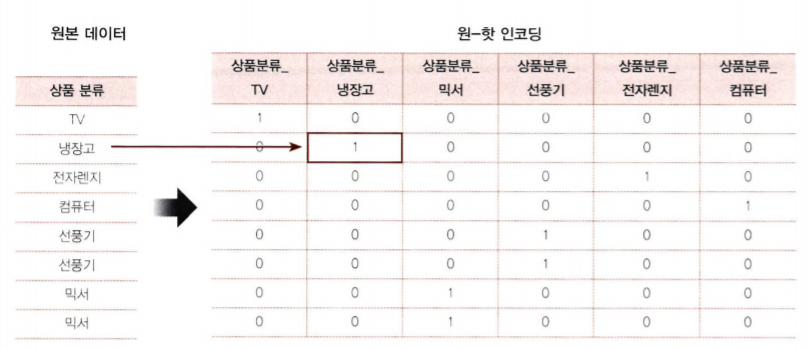

In [34]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


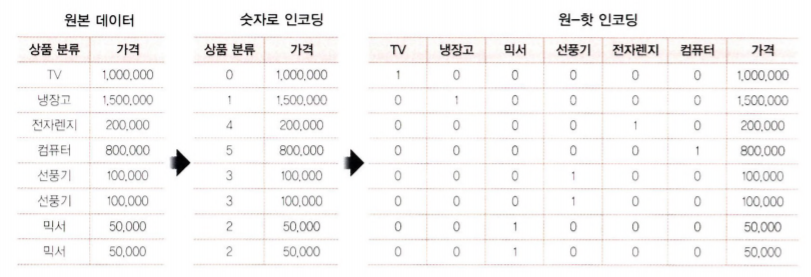

> * 피처 스케일링과 정규화
>>서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업. 대표적 인 방법으로 표준화(Standardization)와 정규화(Normalization)
>> * 표준화<br>
표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1 인 가우시안 정규 분포를 가진 값으로 변환하는
것을 의미
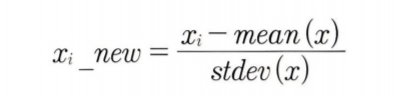<br><br>


>>변수를 모두 동일한 크기 단위로 비교하기 위
해 값을 모두 최소 0 〜 최대 1 의 값으로 변환
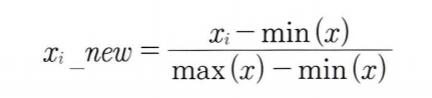<br><br>


>>그런데 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있다. 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠 준다. 세 개의 피처 x y, z가 있다고 하면 새로운 데이터 xi_new는 원래 값에서 세 개
의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠 준 것
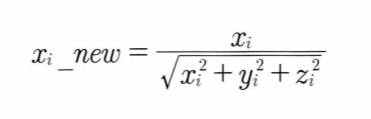<br><br>
혼선을 방지하기 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념
의 정규화를 벡터 정규화로 지칭<br><br>
>> * StandardScaler
>>>StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스. 즉, 개별 피처를 평균이
0이고, 분산이 1 인 값으로 변환해줌. 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환
하는 것은 몇몇 알고리즘에서 매우 중요한데 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포
트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic
Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를
적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

In [36]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [37]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


=> 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1 에 아주 가까운 값으로 변환됐음

>> * MinMaxScaler
>>>MinMaxScaler는 데이터값을 0과 1사이의 범위 값
으로 변환(음수 값이 있으면 -1 에서 1 값으로 변환)<br>
데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있음

In [38]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


=> 모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음

>> * 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
>>> StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit( ),
transform( ), fit_transform( ) 메소드를 이용. 일반적으로 fit()은 데이터 변환을 위한 기준 정
보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용하며 transform( )은 이렇게 설정된
정보를 이용해 데이터를 변환. 그리고 fit_transform()은 fit()과 transform()을 한번에 적용하는 기능을 수행.<br>
그런데 학습 데이터 세트와 테스트 데이터 세트에 이 fit()과 transform()을 적용할 때 주의가 필요. Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트
로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환
을 적용해야 한다는 것이다. 즉 학습 데이터로 fit( )이 적용된 스케일링 기준 정보를 그대로 테스트
데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면
학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출
하지 못할 수 있다.


In [39]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [40]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


=> 1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()
된 Scaler 객체를 이용해 transform()으로 변환

---

**06. 사이킷런으로 수행하는 타이타닉 생존자 예측**


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("C:\\Users\\Administrator\\Documents\\titanic_train.csv", encoding = "cp949", engine = "python")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [49]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [50]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [51]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N                  687
B96 B98              4
C23 C25 C27          4
G6                   4
F2                   3
F33                  3
E101                 3
D                    3
C22 C26              3
E44                  2
F G73                2
E33                  2
C68                  2
B57 B59 B63 B66      2
E8                   2
E25                  2
E67                  2
D17                  2
B5                   2
C126                 2
C78                  2
C83                  2
D36                  2
C52                  2
B22                  2
B58 B60              2
B28                  2
C123                 2
D35                  2
B18                  2
                  ... 
B3                   1
B19                  1
E31                  1
B86                  1
B4                   1
C91                  1
E12                  1
E40                  1
A7                   1

In [52]:
#Cabin 속성의 경우 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [53]:
#성별에 따른 생존자 수를 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

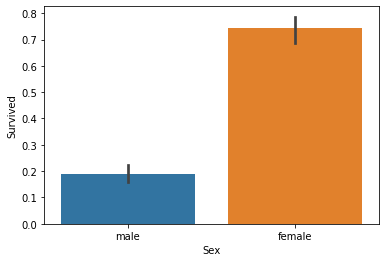

In [54]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

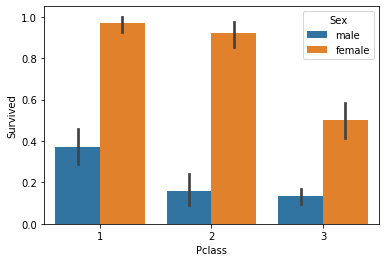

In [55]:
#부자와 가난한 사람 간의 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

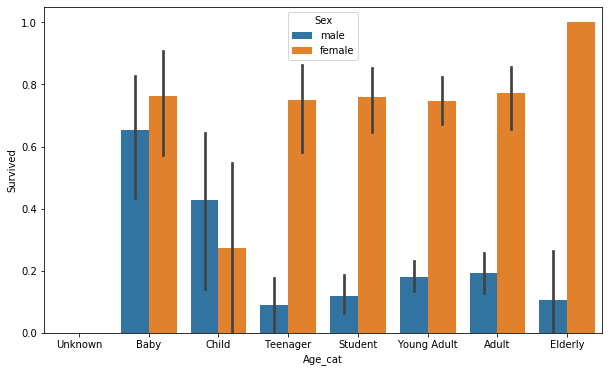

In [56]:
#Age에 따른 생존 확률
# Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [57]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
#인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩
#LabelEncocler 객체는 카테고리 값의 유형 수에 따라 0 〜 (카테고리 유형 수-1 )까지의 숫자 값으로 변환
#사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 fit(), transform()으로 데이터를 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [58]:
#데이터의 전처리를 전체적으로 호출하는 함수는 transform_featiires( )이며 Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [59]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv("C:\\Users\\Administrator\\Documents\\titanic_train.csv", encoding = "cp949", engine = "python")
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8324
LogisticRegression 정확도: 0.8659


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [64]:

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


=> 최적화된 하이퍼 파라미터인 max_depth=3. min_samples_leaf=l. min_samples_split=2로
DecisionTreeClassifier# 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됨. 하이퍼 파라미터
변경 전보다 약 8% 이상이 증가했는데. 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로
증가하기는 매우 어렵다. 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가
한 것처럼 보임.


---

**07.정리**

지금까지 사이킷런을 기반으로 머신러닝 애플리케이션을 쉽게 구현해 봤습니다. 사이킷런은 매우 많
은 머신러닝 알고리즘을 제공할 뿐만 아니라. 쉽고 직관적인 API 프레임워크. 편리하고 다양한 모듈 지
원등으로 파이썬 계열의 대표적인 머신러닝 패키지로 자리 잡았습니다. 파이썬 기반의 머신러닝 패키지
에서 사이킷런만큼 다양한 머신러닝 기능을 제공하는 패키지는 없습니다. 많은 머신러닝 클래스와 다양한
지원 모듈과 더불어 사이킷런의 직관적인 API는 머신러닝 애플리케이션을 쉽게 구현해 줍니다.<br>
머신러닝 애플리케이션은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터를 학습 데이터와 테스트
데이터로 분리하는 데이터 세트 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을
적용해 모델을 학습시킵니다. 그리고 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행하고.
이렇게 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성
됩니다.<br>
데이터의 전처리 작업은 오류 데이터의 보정이나 결손값(Null) 처리 등의 다앙한 데이터 클렌징 작업,
레이블 인코딩이나 원-핫 인코딩과 같은 인코딩 작업. 그리고 데이터의 스케일링/정규화 작업 등으로
머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리하는 것입니다.<br>
머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 합니
다. 또한 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과
평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높습니다.
이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트
로 분리해 교차 검증을 수행할 수 있습니다. 사이킷런은 이러한 교차 검증을 지원하기 위해 KFolcl,
StratifiedKFold, cross_val_score( ) 등의 다양한 클래스와 함수를 제공합니다. 또한 머신러닝 모델
의 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공합니다